# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [7]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data2/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [10]:
# set up lists to hold reponse info
Lat = []
Lng = []
Max_temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
City_Found = []

rec=1
setx=1
# Loop through the list of cities and perform a request for data on each

print(f"Beginning Data Retrieval") 
print(f"_____________________________") 

for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        City_Found.append(response['name'])
        print(f"Processing record {rec} of Set {setx} | city") 
        rec += 1
        if rec == 51:
            time.sleep(60)
            setx += 1
            rec = 1
    except:
        print("City not found. Skipping...")
        
        

Beginning Data Retrieval
_____________________________
Processing record 1 of Set 1 | city
Processing record 2 of Set 1 | city
Processing record 3 of Set 1 | city
Processing record 4 of Set 1 | city
Processing record 5 of Set 1 | city
Processing record 6 of Set 1 | city
Processing record 7 of Set 1 | city
City not found. Skipping...
Processing record 8 of Set 1 | city
Processing record 9 of Set 1 | city
City not found. Skipping...
Processing record 10 of Set 1 | city
City not found. Skipping...
Processing record 11 of Set 1 | city
Processing record 12 of Set 1 | city
Processing record 13 of Set 1 | city
Processing record 14 of Set 1 | city
Processing record 15 of Set 1 | city
Processing record 16 of Set 1 | city
Processing record 17 of Set 1 | city
Processing record 18 of Set 1 | city
Processing record 19 of Set 1 | city
Processing record 20 of Set 1 | city
Processing record 21 of Set 1 | city
Processing record 22 of Set 1 | city
Processing record 23 of Set 1 | city
Processing record 2

Processing record 9 of Set 5 | city
City not found. Skipping...
Processing record 10 of Set 5 | city
Processing record 11 of Set 5 | city
Processing record 12 of Set 5 | city
Processing record 13 of Set 5 | city
Processing record 14 of Set 5 | city
Processing record 15 of Set 5 | city
Processing record 16 of Set 5 | city
Processing record 17 of Set 5 | city
Processing record 18 of Set 5 | city
Processing record 19 of Set 5 | city
Processing record 20 of Set 5 | city
City not found. Skipping...
City not found. Skipping...
Processing record 21 of Set 5 | city
Processing record 22 of Set 5 | city
Processing record 23 of Set 5 | city
Processing record 24 of Set 5 | city
Processing record 25 of Set 5 | city
Processing record 26 of Set 5 | city
Processing record 27 of Set 5 | city
Processing record 28 of Set 5 | city
Processing record 29 of Set 5 | city
Processing record 30 of Set 5 | city
Processing record 31 of Set 5 | city
Processing record 32 of Set 5 | city
Processing record 33 of Set 5

Processing record 18 of Set 9 | city
City not found. Skipping...
Processing record 19 of Set 9 | city
Processing record 20 of Set 9 | city
Processing record 21 of Set 9 | city
City not found. Skipping...
Processing record 22 of Set 9 | city
Processing record 23 of Set 9 | city
Processing record 24 of Set 9 | city
Processing record 25 of Set 9 | city
Processing record 26 of Set 9 | city
Processing record 27 of Set 9 | city
Processing record 28 of Set 9 | city
Processing record 29 of Set 9 | city
Processing record 30 of Set 9 | city
Processing record 31 of Set 9 | city
Processing record 32 of Set 9 | city
City not found. Skipping...
Processing record 33 of Set 9 | city
Processing record 34 of Set 9 | city
City not found. Skipping...
Processing record 35 of Set 9 | city
Processing record 36 of Set 9 | city
Processing record 37 of Set 9 | city
Processing record 38 of Set 9 | city
Processing record 39 of Set 9 | city
Processing record 40 of Set 9 | city
Processing record 41 of Set 9 | city


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [11]:
cities_df = pd.DataFrame({"City": City_Found, "Lat":Lat, "Lng": Lng, "Max Temp": Max_temp,
                    "Humidity": Humidity, "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed, 
                     "Country":Country, "Date": Date})
cities_df.to_csv(output_data_file, index=False)
cities_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,54.09,63,68,18.81,AU,1644187133
1,Puerto Madero,14.7208,-92.4215,81.52,65,45,6.93,MX,1644187384
2,Rikitea,-23.1203,-134.9692,79.30,70,3,17.92,PF,1644187117
3,Vaini,-21.2000,-175.2000,77.16,100,100,12.66,TO,1644187234
4,Tyrma,50.0833,132.1667,-17.77,100,100,0.98,RU,1644187385
...,...,...,...,...,...,...,...,...,...
555,Kamiiso,41.8167,140.6500,10.78,92,40,4.61,JP,1644188192
556,Monze,-16.2833,27.4833,62.10,92,86,4.43,ZM,1644188192
557,Igarka,67.4667,86.5833,-21.60,99,58,7.63,RU,1644188192
558,Rassvet,46.8333,40.7500,30.79,99,100,13.42,RU,1644188193


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = cities_df.loc[cities_df["Humidity"] <= 100]

cities_filtered = cities_df.loc[cities_df["Humidity"] > 100]


In [13]:
#  Get the indices of cities that have humidity over 100%.

cities_filtered.index
#No cities with more than 100% humidity found

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

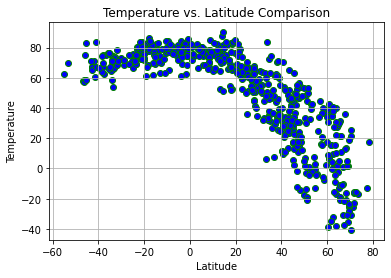

In [21]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], c = "b", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs. Latitude Comparison")

plt.savefig("../output_data2/fig_lat_temp")
plt.show()

This plot is looking for a pattern of temperature vs latitude. It makes sense that as close you get to the (lat=0), the higher the maxt temperature will be.

## Latitude vs. Humidity Plot

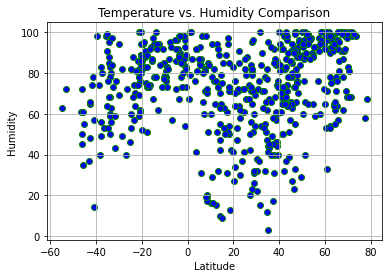

In [22]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], c = "b", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Temperature vs. Humidity Comparison")

plt.savefig("../output_data2/fig_lat_hum.png")
plt.show()

This plot is looking for a pattern of humidity vs latitude. Visually, there is no clear correlation, although lower humidity is only found in the mid-upper hemisphere (lat between 0 and 40) for this time of the year. 

## Latitude vs. Cloudiness Plot

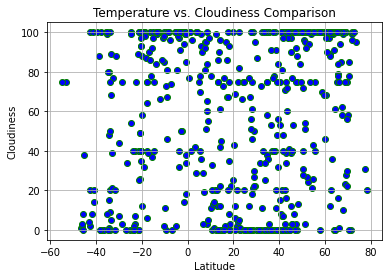

In [23]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], c = "b", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Temperature vs. Cloudiness Comparison")

plt.savefig("../output_data2/fig_lat_cloud.png")
plt.show()

This plot is looking for a pattern of cloudiness vs latitude. No discernable pattern is noted.

## Latitude vs. Wind Speed Plot

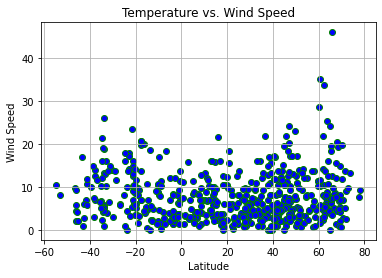

In [24]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], c = "b", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Temperature vs. Wind Speed")

plt.savefig("../output_data2/fig_lat_wind_spd.png")
plt.show()

This plot is looking for a pattern of Wind Speed vs latitude. It can be seen that the highest wind speed are found in the upper northern hemusphere and some in the southern hemisphere. 

## Linear Regression

In [25]:
clean_city_data_nh = clean_city_data.loc[clean_city_data["Lat"] >= 0]
clean_city_data_sh = clean_city_data.loc[clean_city_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

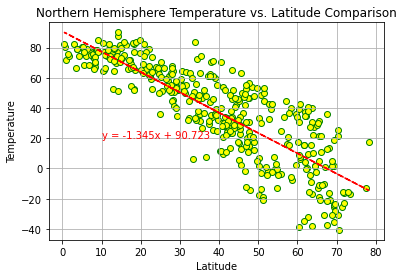

The 'r' value is: -0.84048


In [26]:
lat_nh = clean_city_data_nh["Lat"]
temp_nh = clean_city_data_nh["Max Temp"]

plt.scatter(lat_nh, temp_nh, c = "yellow", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere Temperature vs. Latitude Comparison")


(nt_slope, nt_int, nt_r, nt_p, nt_std_err) = linregress(lat_nh, temp_nh)
nt_slope = nt_slope.round(3)
nt_int = nt_int.round(3)
temp_lat = nt_slope*lat_nh + nt_int

plt.plot(lat_nh, temp_lat, "--", color = "r")
plt.text(10,20,f"y = {nt_slope}x + {nt_int}", c = "r")
plt.savefig("../output_data2/fig_lat_tem_regnh.png")
plt.show()
print(f"The 'r' value is: {round(nt_r,5)}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

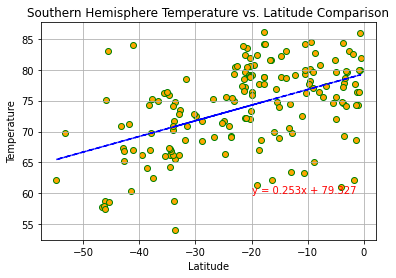

The 'r' value is: 0.49167


In [27]:
lat_sh = clean_city_data_sh["Lat"]
temp_sh = clean_city_data_sh["Max Temp"]

plt.scatter(lat_sh, temp_sh, c = "orange", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere Temperature vs. Latitude Comparison")


(st_slope, st_int, st_r, st_p, st_std_err) = linregress(lat_sh, temp_sh)
st_slope = st_slope.round(3)
st_int = st_int.round(3)
temp_s_lat = st_slope*lat_sh + st_int

plt.plot(lat_sh, temp_s_lat, "--", color = "b")
plt.text(-20,60,f"y = {st_slope}x + {st_int}", c = "r")
plt.savefig("../output_data2/fig_lat_tem_regsh.png")
plt.show()
print(f"The 'r' value is: {round(st_r,5)}")



There is a better correlation between temperature and latitude in the northern hemisphere (r = -0.84 vs 0.51). The relationships are inverse for both hemisphere indicating that as the latitude gets closer to the equator (lat =0), the highest the temperature will get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

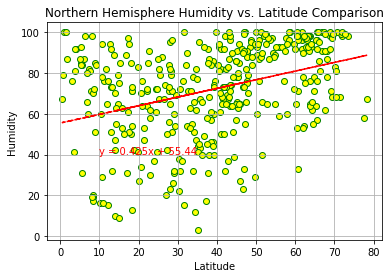

The 'r' value is: 0.36351


In [39]:
lat_nh = clean_city_data_nh["Lat"]
hum_nh = clean_city_data_nh["Humidity"]

plt.scatter(lat_nh, hum_nh, c = "yellow", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity vs. Latitude Comparison")


(nh_slope, nh_int, nh_r, nh_p, nh_std_err) = linregress(lat_nh, hum_nh)
nh_slope = nh_slope.round(3)
nh_int = nh_int.round(3)
hum_lat = nh_slope*lat_nh + nh_int

plt.plot(lat_nh, hum_lat, "--", color = "r")
plt.text(10,40,f"y = {nh_slope}x + {nh_int}", c = "r")
plt.savefig("../output_data2/fig_lat_hum_regnh.png")
plt.show()
print(f"The 'r' value is: {round(nh_r,5)}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

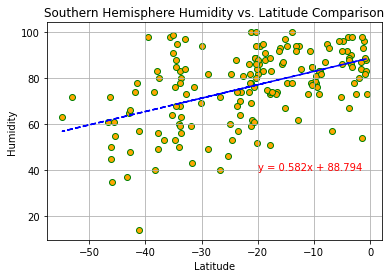

The 'r' value is: 0.48945


In [38]:
lat_sh = clean_city_data_sh["Lat"]
hum_sh = clean_city_data_sh["Humidity"]

plt.scatter(lat_sh, hum_sh, c = "orange", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity vs. Latitude Comparison")


(sh_slope, sh_int, sh_r, sh_p, sh_std_err) = linregress(lat_sh, hum_sh)
sh_slope = sh_slope.round(3)
sh_int = sh_int.round(3)
hum_s_lat = sh_slope*lat_sh + sh_int

plt.plot(lat_sh, hum_s_lat, "--", color = "b")
plt.text(-20,40,f"y = {sh_slope}x + {sh_int}", c = "r")
plt.savefig("../output_data2/fig_lat_hum_regsh.png")
plt.show()
print(f"The 'r' value is: {round(sh_r,5)}")


The correlation between humidity and latitude is less clear. In the northern hemisphere, average humidity for the cities in the data frame is higher at higher latitudes (40-70).  In the southern hemisphere, higher humidity is seen closer to the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

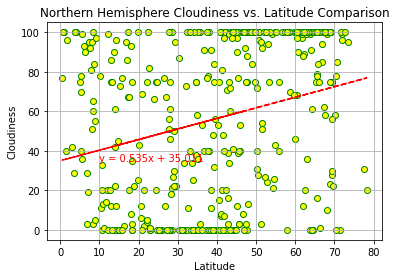

The 'r' value is: 0.26231


In [37]:
lat_nh = clean_city_data_nh["Lat"]
clo_nh = clean_city_data_nh["Cloudiness"]

plt.scatter(lat_nh, clo_nh, c = "yellow", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs. Latitude Comparison")


(nc_slope, nc_int, nc_r, nc_p, nc_std_err) = linregress(lat_nh, clo_nh)
nc_slope = nc_slope.round(3)
nc_int = nc_int.round(3)
clo_lat = nc_slope*lat_nh + nc_int

plt.plot(lat_nh, clo_lat, "--", color = "r")
plt.text(10,35,f"y = {nc_slope}x + {nc_int}", c = "r")
plt.savefig("../output_data2/fig_lat_cloud_regnh.png")
plt.show()
print(f"The 'r' value is: {round(nc_r,5)}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

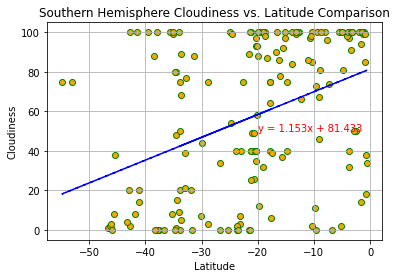

The 'r' value is: 0.39849


In [36]:
lat_sh = clean_city_data_sh["Lat"]
clo_sh = clean_city_data_sh["Cloudiness"]

plt.scatter(lat_sh, clo_sh, c = "orange", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs. Latitude Comparison")


(sc_slope, sc_int, sc_r, sc_p, sc_std_err) = linregress(lat_sh, clo_sh)
sc_slope = sc_slope.round(3)
sc_int = sc_int.round(3)
clo_s_lat = sc_slope*lat_sh + sc_int

plt.plot(lat_sh, clo_s_lat, "--", color = "b")
plt.text(-20,50,f"y = {sc_slope}x + {sc_int}", c = "r")
plt.savefig("../output_data2/fig_lat_cloud_regsh.png")
plt.show()
print(f"The 'r' value is: {round(sc_r,5)}")



There is poor correlation between cloudiness and latitude for the northern and southern hemispheres (r = 0.21 and 0.246).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

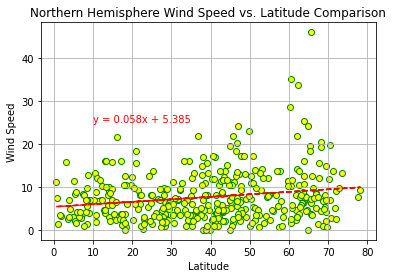

The 'r' value is: 0.1936


In [35]:
lat_nh = clean_city_data_nh["Lat"]
ws_nh = clean_city_data_nh["Wind Speed"]

plt.scatter(lat_nh, ws_nh, c = "yellow", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed vs. Latitude Comparison")


(nw_slope, nw_int, nw_r, nw_p, nw_std_err) = linregress(lat_nh, ws_nh)
nw_slope = nw_slope.round(3)
nw_int = nw_int.round(3)
ws_lat = nw_slope*lat_nh + nw_int

plt.plot(lat_nh, ws_lat, "--", color = "r")
plt.text(10,25,f"y = {nw_slope}x + {nw_int}", c = "r")
plt.savefig("../output_data2/fig_lat_ws_regnh.png")
plt.show()
print(f"The 'r' value is: {round(nw_r,5)}")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

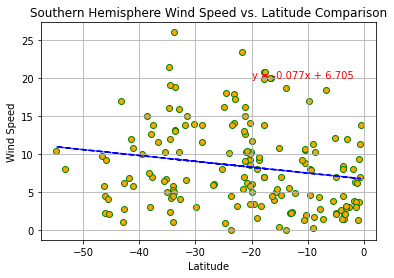

The 'r' value is: -0.18603


In [34]:
lat_sh = clean_city_data_sh["Lat"]
ws_sh = clean_city_data_sh["Wind Speed"]

plt.scatter(lat_sh, ws_sh, c = "orange", edgecolor = "g")
plt.grid(visible=True, which='major', axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed vs. Latitude Comparison")


(sw_slope, sw_int, sw_r, sw_p, sw_std_err) = linregress(lat_sh, ws_sh)
sw_slope = sw_slope.round(3)
sw_int = sw_int.round(3)
ws_s_lat = sw_slope*lat_sh + sw_int

plt.plot(lat_sh, ws_s_lat, "--", color = "b")
plt.text(-20,20,f"y = {sw_slope}x + {sw_int}", c = "r")
plt.savefig("../output_data2/fig_lat_ws_regsh.png")
plt.show()
print(f"The 'r' value is: {round(sw_r,5)}")




For both, the northern and southern hemispheres, the linear correlation between wind speed and latitude is also poor. However, in the northern hemisphere, the highest average wind in higher at higher latitudes. In the southern hemisphere, you see the highest wind speeds between latitudes -40 and -15. More consistent, low wind speeds are seen closer to the equator.